In [6]:
import os
import xarray as xr
import numpy as np

from osprey.actions.forecaster import forecaster_EOFS
from osprey.means.eof import preproc_pattern_3D, preproc_timeseries_3D
from osprey.actions.reader import reader_rebuilt
from osprey.utils.folders import folders

In [7]:
expname = "FE00"
var = "thetao"
ndim ="3D"
startyear = 1995
endyear = 1999
endleg = 11
yearspan = 5
yearleap = 10

In [8]:
dirs = folders(expname)

In [9]:
pattern = xr.open_mfdataset(os.path.join(dirs['tmp'], str(endleg).zfill(3), f"{var}_pattern_{startyear}-{endyear}.nc"), use_cftime=True, preprocess=preproc_pattern_3D)

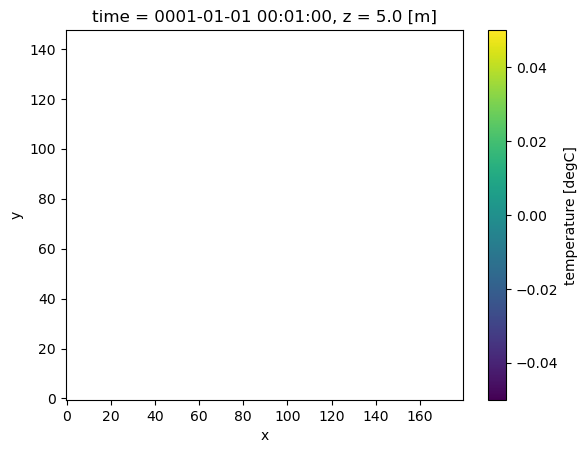

In [18]:
pattern['thetao'].isel(time=0,z=0).plot()

In [12]:
field = pattern.isel(time=0)*0
for i in range(4):
    filename = os.path.join(dirs['tmp'], str(endleg).zfill(3), f"{var}_timeseries_{startyear}-{endyear}_0000{i}.nc")
    timeseries = xr.open_mfdataset(filename, use_cftime=True, preprocess=preproc_timeseries_3D)
    p = timeseries.polyfit(dim='time', deg=1, skipna = True)
    #theta = xr.polyval(timeseries['time'].isel(time=-1), p[f"{var}_polyfit_coefficients"])
    theta = timeseries['thetao'].isel(time=-1)
    laststep = pattern.isel(time=i)
    field = field + theta.isel(lat=0,lon=0)*laststep

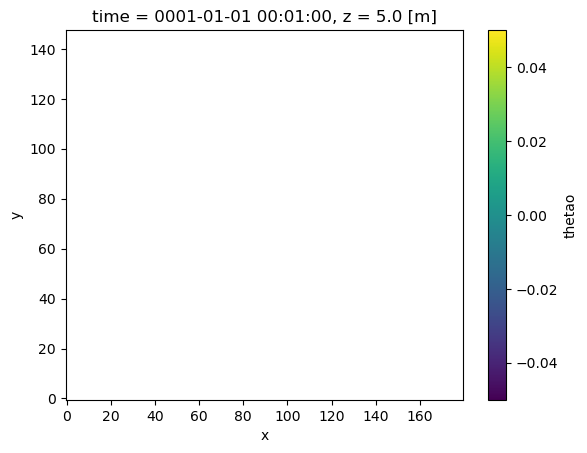

In [14]:
field['thetao'].isel(z=0).plot()

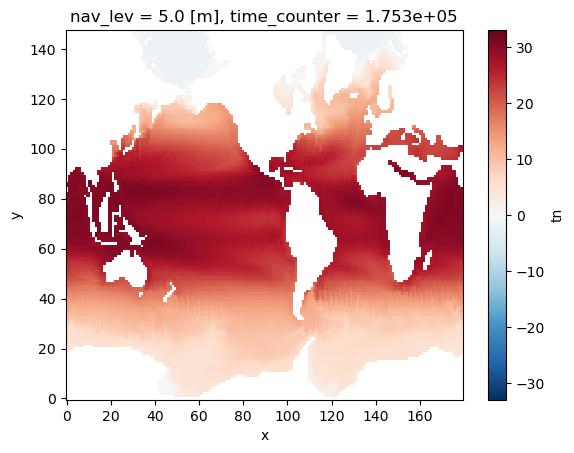

In [6]:
thetafit['tn'].isel(nav_lev=0).plot(vmin=-2, vmax=35)

In [ ]:
rdata = reader_rebuilt(expname, endleg, endleg)

In [ ]:
var='tn'
delta = rdata[var]-thetafit[var]
delta.isel(nav_lev=0).plot(vmin=-2, vmax=35)